# Sections 2E and 2F

##### Section 2E: Grade Breakdown
##### Section 2F: District Breakdown


### Section 2E: Grade Breakdown

Create spreadsheets and graphics to look at the data by different grades to see if there are any trends, particularly any grade that was most affected or least affected by COVID as it related to enrollment in California school (K-12).  

In [1]:
#load libraries needed for the notebook
library(dplyr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Load in the dataframe from our saved .Rda file
df <- readRDS(file="Group7DataFrame.Rda")

In [3]:
#select columns K-12 and sum all student enrollments per grade and per year
grade_enrollment_sums = df %>% select(c(7:15,17:20, 24)) %>% group_by(Year) %>% summarize_all(sum)
head(grade_enrollment_sums)

Year,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2015,511985,464323,469713,485624,475192,472156,469413,464286,467038,495004,480753,477097,496901
2016,530531,444573,463881,470157,485885,476427,471467,470753,465322,487202,488004,472968,492835
2017,535379,456002,445553,465165,471141,487493,475809,473574,472340,487548,486085,481521,484169
2018,531725,456175,455523,447253,466660,472202,486261,477308,474828,495277,483745,475696,489221
2019,525758,448028,454542,455718,448061,467215,471008,487027,477835,493903,492690,474843,489650
2020,523009,444120,447239,455273,456361,448701,465730,471541,487838,500397,496819,479381,486592


In [4]:
#Add a new column with the sum of enrolled K-12  (leaving out Adult, etc)
K_thru_12_2015_thru_2021_ENR = grade_enrollment_sums %>% mutate(K_12_ENR_TOTAL = rowSums(.[2:14]))
head(K_thru_12_2015_thru_2021_ENR)

Year,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12,K_12_ENR_TOTAL
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2015,511985,464323,469713,485624,475192,472156,469413,464286,467038,495004,480753,477097,496901,6229485
2016,530531,444573,463881,470157,485885,476427,471467,470753,465322,487202,488004,472968,492835,6220005
2017,535379,456002,445553,465165,471141,487493,475809,473574,472340,487548,486085,481521,484169,6221779
2018,531725,456175,455523,447253,466660,472202,486261,477308,474828,495277,483745,475696,489221,6211874
2019,525758,448028,454542,455718,448061,467215,471008,487027,477835,493903,492690,474843,489650,6186278
2020,523009,444120,447239,455273,456361,448701,465730,471541,487838,500397,496819,479381,486592,6163001


In [5]:
#convert a wide dataset to a long tidy dataset 
K_thru_12_2015_thru_2021_ENR_l = K_thru_12_2015_thru_2021_ENR %>% gather(Grade, Total, KDGN:GR_12)
head(K_thru_12_2015_thru_2021_ENR_l)

Year,K_12_ENR_TOTAL,Grade,Total
<fct>,<dbl>,<chr>,<int>
2015,6229485,KDGN,511985
2016,6220005,KDGN,530531
2017,6221779,KDGN,535379
2018,6211874,KDGN,531725
2019,6186278,KDGN,525758
2020,6163001,KDGN,523009


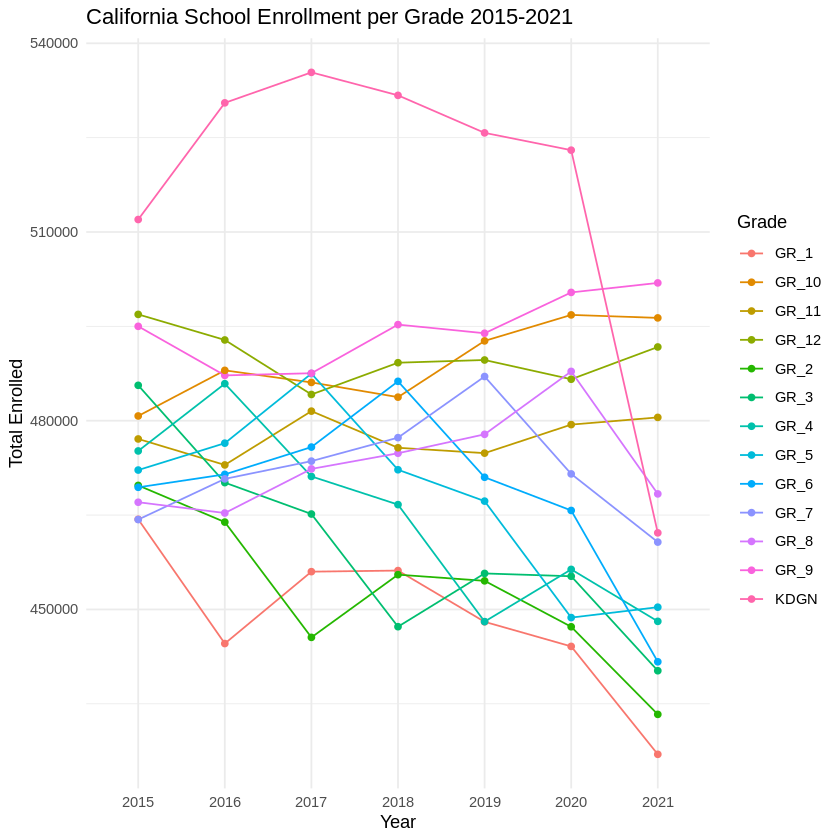

In [6]:
#plot 2015-2021 enrollment totals by grade level. Earlier grades seem to have decreases from 2020 to 2021. Kindergarten notably
#has the greatest decline.
p = ggplot(data=K_thru_12_2015_thru_2021_ENR_l, aes(x=Year, y=Total, group=Grade, color=Grade)) +
    geom_line() + 
    geom_point()
p = p + labs(title="California School Enrollment per Grade 2015-2021 ", x = "Year", y = "Total Enrolled") +
    theme_minimal()   
  
p

In [7]:
seven_yr_grade_enroll_sums = df %>% select(c(7:15,17:20, 24)) %>% group_by(Year) %>% summarize_all(sum) 
head(seven_yr_grade_enroll_sums)

Year,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2015,511985,464323,469713,485624,475192,472156,469413,464286,467038,495004,480753,477097,496901
2016,530531,444573,463881,470157,485885,476427,471467,470753,465322,487202,488004,472968,492835
2017,535379,456002,445553,465165,471141,487493,475809,473574,472340,487548,486085,481521,484169
2018,531725,456175,455523,447253,466660,472202,486261,477308,474828,495277,483745,475696,489221
2019,525758,448028,454542,455718,448061,467215,471008,487027,477835,493903,492690,474843,489650
2020,523009,444120,447239,455273,456361,448701,465730,471541,487838,500397,496819,479381,486592


In [8]:
#Add a new column with the sum of enrolled K-12  (leaving out Adult, etc)
K_thru_12_2015_thru_2021_ENR = seven_yr_grade_enroll_sums %>% mutate(K_12_ENR_TOTAL = rowSums(.[2:14]))
head(K_thru_12_2015_thru_2021_ENR)

Year,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12,K_12_ENR_TOTAL
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2015,511985,464323,469713,485624,475192,472156,469413,464286,467038,495004,480753,477097,496901,6229485
2016,530531,444573,463881,470157,485885,476427,471467,470753,465322,487202,488004,472968,492835,6220005
2017,535379,456002,445553,465165,471141,487493,475809,473574,472340,487548,486085,481521,484169,6221779
2018,531725,456175,455523,447253,466660,472202,486261,477308,474828,495277,483745,475696,489221,6211874
2019,525758,448028,454542,455718,448061,467215,471008,487027,477835,493903,492690,474843,489650,6186278
2020,523009,444120,447239,455273,456361,448701,465730,471541,487838,500397,496819,479381,486592,6163001


In [9]:
#Add a new column with the sum of enrolled elementary grades (K-5)  (leaving out Adult, etc)
K_thru_12_2015_thru_2021_ENR.2  <- K_thru_12_2015_thru_2021_ENR  %>%  mutate(ELE_ENR_TOTAL = rowSums(.[2:7]))
head(K_thru_12_2015_thru_2021_ENR.2)

Year,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12,K_12_ENR_TOTAL,ELE_ENR_TOTAL
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
2015,511985,464323,469713,485624,475192,472156,469413,464286,467038,495004,480753,477097,496901,6229485,2878993
2016,530531,444573,463881,470157,485885,476427,471467,470753,465322,487202,488004,472968,492835,6220005,2871454
2017,535379,456002,445553,465165,471141,487493,475809,473574,472340,487548,486085,481521,484169,6221779,2860733
2018,531725,456175,455523,447253,466660,472202,486261,477308,474828,495277,483745,475696,489221,6211874,2829538
2019,525758,448028,454542,455718,448061,467215,471008,487027,477835,493903,492690,474843,489650,6186278,2799322
2020,523009,444120,447239,455273,456361,448701,465730,471541,487838,500397,496819,479381,486592,6163001,2774703


In [10]:
#Add a new column with the sum of enrolled middle school grades (6-8)  (leaving out Adult, etc)
K_thru_12_2015_thru_2021_ENR.2  <- K_thru_12_2015_thru_2021_ENR.2  %>%  mutate(MID_ENR_TOTAL = rowSums(.[8:10]))
head(K_thru_12_2015_thru_2021_ENR.2)

Year,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12,K_12_ENR_TOTAL,ELE_ENR_TOTAL,MID_ENR_TOTAL
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
2015,511985,464323,469713,485624,475192,472156,469413,464286,467038,495004,480753,477097,496901,6229485,2878993,1400737
2016,530531,444573,463881,470157,485885,476427,471467,470753,465322,487202,488004,472968,492835,6220005,2871454,1407542
2017,535379,456002,445553,465165,471141,487493,475809,473574,472340,487548,486085,481521,484169,6221779,2860733,1421723
2018,531725,456175,455523,447253,466660,472202,486261,477308,474828,495277,483745,475696,489221,6211874,2829538,1438397
2019,525758,448028,454542,455718,448061,467215,471008,487027,477835,493903,492690,474843,489650,6186278,2799322,1435870
2020,523009,444120,447239,455273,456361,448701,465730,471541,487838,500397,496819,479381,486592,6163001,2774703,1425109


In [11]:
#Add a new column with the sum of enrolled high school grades (9-12)  (leaving out Adult, etc)
K_thru_12_2015_thru_2021_ENR.2  <- K_thru_12_2015_thru_2021_ENR.2  %>%  mutate(HIGH_ENR_TOTAL = rowSums(.[11:14]))
head(K_thru_12_2015_thru_2021_ENR.2)

Year,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12,K_12_ENR_TOTAL,ELE_ENR_TOTAL,MID_ENR_TOTAL,HIGH_ENR_TOTAL
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2015,511985,464323,469713,485624,475192,472156,469413,464286,467038,495004,480753,477097,496901,6229485,2878993,1400737,1949755
2016,530531,444573,463881,470157,485885,476427,471467,470753,465322,487202,488004,472968,492835,6220005,2871454,1407542,1941009
2017,535379,456002,445553,465165,471141,487493,475809,473574,472340,487548,486085,481521,484169,6221779,2860733,1421723,1939323
2018,531725,456175,455523,447253,466660,472202,486261,477308,474828,495277,483745,475696,489221,6211874,2829538,1438397,1943939
2019,525758,448028,454542,455718,448061,467215,471008,487027,477835,493903,492690,474843,489650,6186278,2799322,1435870,1951086
2020,523009,444120,447239,455273,456361,448701,465730,471541,487838,500397,496819,479381,486592,6163001,2774703,1425109,1963189


In [12]:
#convert a wide dataset to a long tidy dataset  
K_thru_12_2015_thru_2021_ENR.3 = K_thru_12_2015_thru_2021_ENR.2 %>% gather(Grade, Total, K_12_ENR_TOTAL:HIGH_ENR_TOTAL)
head(K_thru_12_2015_thru_2021_ENR.3)

Year,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12,Grade,Total
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
2015,511985,464323,469713,485624,475192,472156,469413,464286,467038,495004,480753,477097,496901,K_12_ENR_TOTAL,6229485
2016,530531,444573,463881,470157,485885,476427,471467,470753,465322,487202,488004,472968,492835,K_12_ENR_TOTAL,6220005
2017,535379,456002,445553,465165,471141,487493,475809,473574,472340,487548,486085,481521,484169,K_12_ENR_TOTAL,6221779
2018,531725,456175,455523,447253,466660,472202,486261,477308,474828,495277,483745,475696,489221,K_12_ENR_TOTAL,6211874
2019,525758,448028,454542,455718,448061,467215,471008,487027,477835,493903,492690,474843,489650,K_12_ENR_TOTAL,6186278
2020,523009,444120,447239,455273,456361,448701,465730,471541,487838,500397,496819,479381,486592,K_12_ENR_TOTAL,6163001


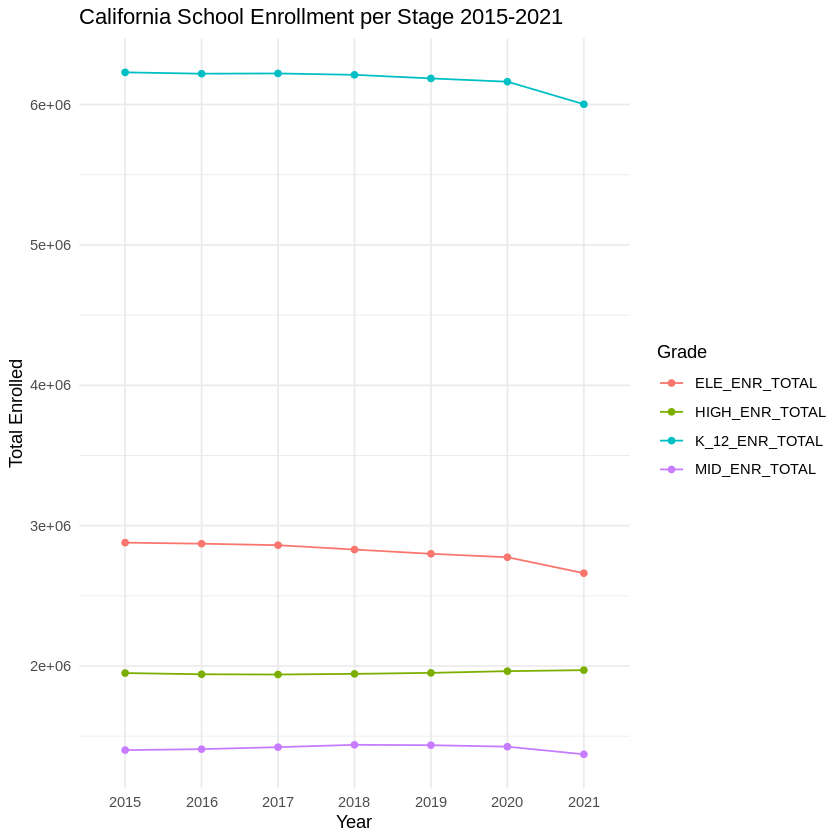

In [13]:
#plot grade stage (Elementary, Middle School, High School, and K-12 Combined) enrollment by year. No visable change for high
#school, a slight decrease for middle school, and a steeper decrease for elementary school.
stage_plot = ggplot(data=K_thru_12_2015_thru_2021_ENR.3, aes(x=Year, y=Total, group=Grade, color=Grade)) +
    geom_line() + 
    geom_point()
stage_plot = stage_plot + labs(title="California School Enrollment per Stage 2015-2021", x = "Year", y = "Total Enrolled") +
    theme_minimal()   
 
stage_plot

### Section 2F: District Breakdown

Create spreadsheets and graphics to look at the data by different school districts to see if there are any trends, particularly any districts that were most affected or least affected by COVID as it related to enrollment in California school (K-12).  

In [14]:
#look at total enrollment per district per year
head(df %>%
select(DISTRICT, SCHOOL, ENR_TOTAL, Year) %>%
group_by(DISTRICT, Year) %>%
summarize(total_enroll = sum(ENR_TOTAL)), 10)

DISTRICT,Year,total_enroll
<fct>,<fct>,<int>
ABC Unified,2015,20998
ABC Unified,2016,20863
ABC Unified,2017,20768
ABC Unified,2018,20550
ABC Unified,2019,20465
ABC Unified,2020,20269
ABC Unified,2021,19540
Acalanes Union High,2015,5402
Acalanes Union High,2016,5546


In [15]:
#Save the district enrollment data into a dataframe called "district_total"
district_total <- df %>%
select(DISTRICT, SCHOOL, Year, ENR_TOTAL) %>%
group_by(DISTRICT, Year)  %>% 
summarize(total_enroll = sum(ENR_TOTAL))

In [16]:
#add percent change per year for total enrolled into the district-specific dataframe
district_total$percent_change <- ((district_total$total_enroll/lag(district_total$total_enroll)-1)*100)

In [17]:
#Sort the data by percentage change in descending order. Make this into a separate dataframe called "district_total2"
district_total2 <- district_total  %>% arrange(desc(percent_change))

In [18]:
#Because we want to specifically look at the percentage change for districts in 2020 and 2021, filter the data by Year == 2020..
#Save this into a new 2020-specific dataframe.
district_total_2020 <- district_total2  %>% filter(Year == 2020)

In [19]:
##To better interpret the ranking of the percentage change in 2020, a row number was added as a column value. Display the 
##top and bottom rows as a visual check.
district_total_2020$rank_2020 <- seq.int(nrow(district_total_2020))
head(district_total_2020)
tail(district_total_2020)

DISTRICT,Year,total_enroll,percent_change,rank_2020
<fct>,<fct>,<int>,<dbl>,<int>
Los Gatos-Saratoga Union High,2020,3542,1311.1554,1
SBE - Watsonville Prep,2020,168,250.0000,2
Lake Elementary,2020,600,224.3243,3
Alta Vista Elementary,2020,1434,149.8258,4
Maple Creek Elementary,2020,9,125.0000,5
Solano County Office of Education,2020,866,118.1360,6


DISTRICT,Year,total_enroll,percent_change,rank_2020
<fct>,<fct>,<int>,<dbl>,<int>
Cuyama Joint Unified,2020,242,-69.21120,1016
SBE - Los Angeles College Prep Academy,2020,113,-71.89055,1017
SBE - College Preparatory Middle,2020,391,-78.97849,1018
Bradley Union Elementary,2020,70,-84.09091,1019
Trona Joint Unified,2020,264,-90.38602,1020
Ravendale-Termo Elementary,2020,7,-98.16273,1021


In [20]:
##Because we're primarily interested in the districts where the most enrollment change occured, districts were filtered to
##display only the top and bottom ten districts. This data was then saved into a new dataframe called 
##"top_bottom_districts_2020"
top_bottom_districts_2020 <- district_total_2020  %>%
filter(rank_2020 < 11 | rank_2020 > 1011)
top_bottom_districts_2020

DISTRICT,Year,total_enroll,percent_change,rank_2020
<fct>,<fct>,<int>,<dbl>,<int>
Los Gatos-Saratoga Union High,2020,3542,1311.15538,1
SBE - Watsonville Prep,2020,168,250.00000,2
Lake Elementary,2020,600,224.32432,3
Alta Vista Elementary,2020,1434,149.82578,4
Maple Creek Elementary,2020,9,125.00000,5
Solano County Office of Education,2020,866,118.13602,6
SBE - Latitude 37.8 High,2020,103,98.07692,7
SBE - KIPP Navigate College Prep,2020,167,87.64045,8
SBE - Baypoint Preparatory Academy San Diego,2020,159,80.68182,9


In [21]:
#district_total data was also filtered by Year == 2021 as was done for districts in 2020. Saved this into a new 
#2021-specific dataframe.
district_total_2021 <- district_total2  %>% filter(Year == 2021)

In [22]:
##To better interpret the ranking of the percentage change in 2021, a row number was added as a column value. Display the 
##top and bottom rows as a visual check.
district_total_2021$rank_2021 <- seq.int(nrow(district_total_2021))
head(district_total_2021)
tail(district_total_2021)

DISTRICT,Year,total_enroll,percent_change,rank_2021
<fct>,<fct>,<int>,<dbl>,<int>
Silver Fork Elementary,2021,18,125.00000,1
Banta Elementary,2021,1943,120.29478,2
Kneeland Elementary,2021,26,116.66667,3
Mendocino County Office of Education,2021,102,92.45283,4
Panoche Elementary,2021,7,75.00000,5
Ravendale-Termo Elementary,2021,12,71.42857,6


DISTRICT,Year,total_enroll,percent_change,rank_2021
<fct>,<fct>,<int>,<dbl>,<int>
San Benito County Office of Education,2021,21,-36.36364,1012
Colusa County Office of Education,2021,20,-37.50000,1013
Plumas County Office of Education,2021,20,-39.39394,1014
Lake County Office of Education,2021,23,-41.02564,1015
SBE - Los Angeles College Prep Academy,2021,64,-43.36283,1016
Amador County Office of Education,2021,25,-87.98077,1017


In [23]:
##Because we're primarily interested in the districts where the most enrollment change occured, districts in 2021 were filtered
##to display only the top and bottom ten districts. This data was then saved into a new dataframe called "top_bottom_districts_2021"
top_bottom_districts_2021 <- district_total_2021  %>%
filter(rank_2021 < 11 | rank_2021 > 1007)
top_bottom_districts_2021

DISTRICT,Year,total_enroll,percent_change,rank_2021
<fct>,<fct>,<int>,<dbl>,<int>
Silver Fork Elementary,2021,18,125.00000,1
Banta Elementary,2021,1943,120.29478,2
Kneeland Elementary,2021,26,116.66667,3
Mendocino County Office of Education,2021,102,92.45283,4
Panoche Elementary,2021,7,75.00000,5
Ravendale-Termo Elementary,2021,12,71.42857,6
SBE - KIPP Navigate College Prep,2021,274,64.07186,7
Spencer Valley Elementary,2021,3883,45.86777,8
SBE - Perseverance Preparatory,2021,48,45.45455,9


In [24]:
##Merge the dataframes together into one dataframe that includes data from the top and bottom districts from 2020 and 2021
top_bottom_districts <- rbind(top_bottom_districts_2020, top_bottom_districts_2021)

In [25]:
#filter for the total enrollment and percent change for the 3 districts experiencing the top % enr change in 2021
#to look at the historic trends
district_totals <- df %>%
select(DISTRICT,Year,ENR_TOTAL) %>%
group_by(DISTRICT,Year)%>% 
summarize(total_enroll = sum(ENR_TOTAL)) %>%
mutate(percent_change = (total_enroll/lag(total_enroll)-1)*100) 

district_top_3 <- filter(district_totals, DISTRICT == 'Silver Fork Elementary'| DISTRICT == 'Banta Elementary'|
                                DISTRICT == 'Kneeland Elementary')
head(district_top_3)

DISTRICT,Year,total_enroll,percent_change
<fct>,<fct>,<int>,<dbl>
Banta Elementary,2015,795,NA
Banta Elementary,2016,1202,51.194969
Banta Elementary,2017,770,-35.940100
Banta Elementary,2018,851,10.519481
Banta Elementary,2019,872,2.467685
Banta Elementary,2020,882,1.146789


Warning message:
“Removed 3 rows containing missing values (position_stack).”

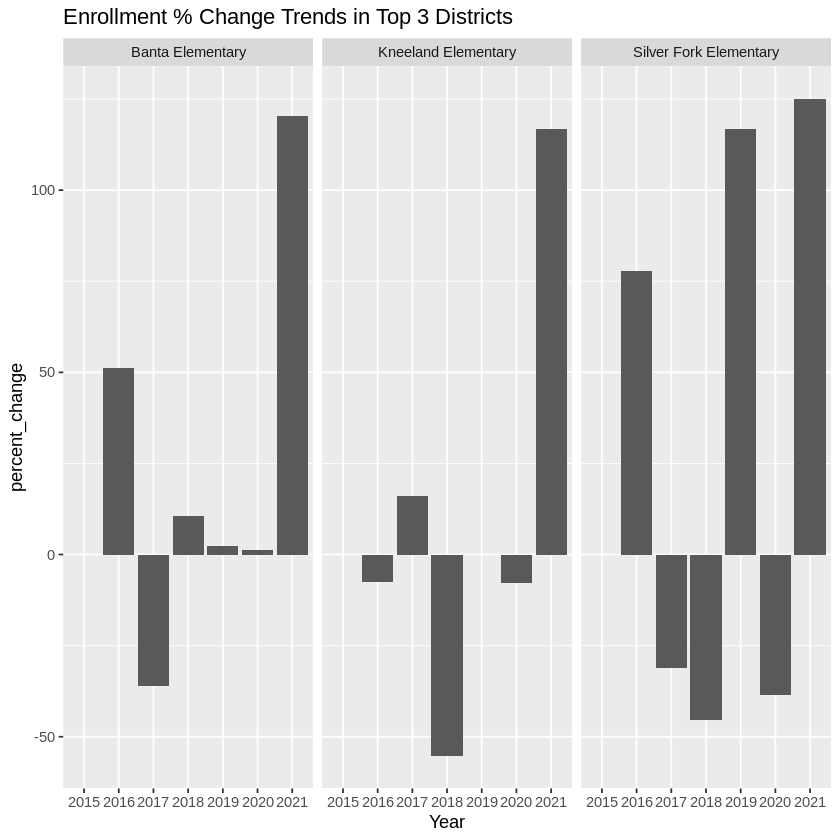

In [26]:
#Plot the % change in each of the "top 3" districts
ggplot(district_top_3, aes(Year, percent_change)) + 
       geom_bar(stat='identity') + facet_wrap(~DISTRICT) + ggtitle('Enrollment % Change Trends in Top 3 Districts')

Banta and Kneeland both experience much larger % shifts in enrollment than historically. Silver Fork has been subject to large enrollment shifts in the past, however this was the greatest.

Warning message:
“Removed 3 rows containing missing values (geom_point).”

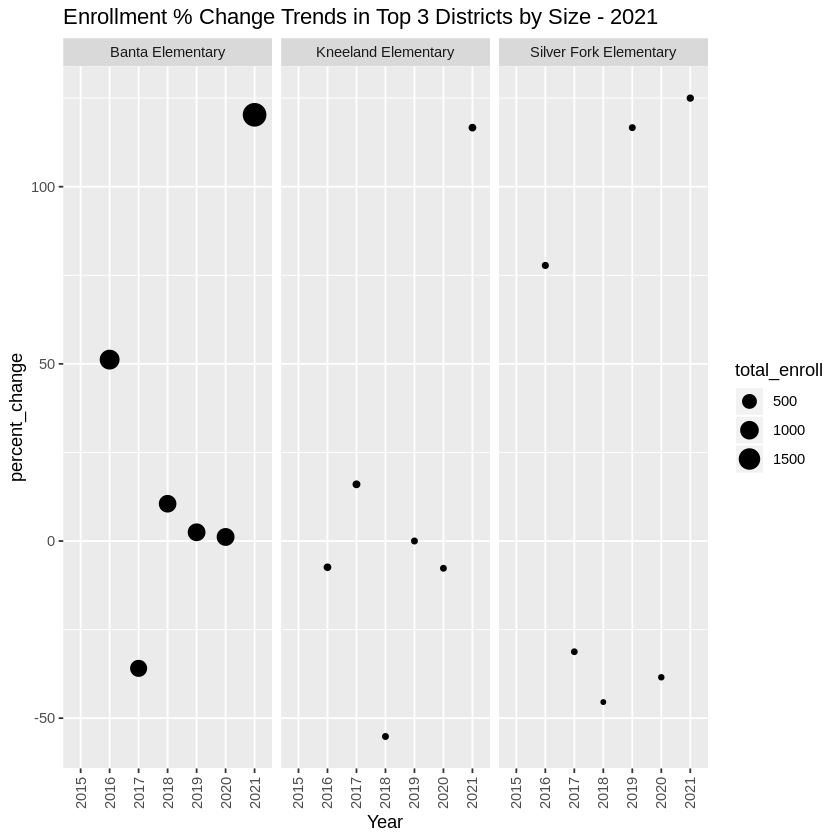

In [27]:
#plot the same districts using total enrollment as a size aesthetic in order to view differences and 
#trends in size and percent change in enrollment
ggplot(district_top_3, aes(Year, percent_change, size=total_enroll)) + 
       geom_point() + facet_wrap(~DISTRICT) + ggtitle('Enrollment % Change Trends in Top 3 Districts by Size - 2021') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [28]:
#filter for districts experiencing no change in enrollment in 2021 to determine which ones to look at more in depth
no_change_districts <- district_total_2021 %>%
filter(percent_change < 0.2 & percent_change > -0.2)

no_change_districts <- no_change_districts[5:7,]
no_change_districts

DISTRICT,Year,total_enroll,percent_change,rank_2021
<fct>,<fct>,<int>,<dbl>,<int>
Big Lagoon Union Elementary,2021,24,0,227
Pond Union Elementary,2021,164,0,228
Richmond Elementary,2021,211,0,229


Big Lagoon, Pond Union, and Richmond districts all experiences no percent change in enrollment in 2021. Each school has a small enrollment total.

In [29]:
#filter for the total enrollment and percent change historical trends for each of the districts seeing no enrollment changes
#in 2021
district_totals <- df %>%
select(DISTRICT, Year, ENR_TOTAL) %>%
group_by(DISTRICT, Year)%>% 
summarize(total_enroll = sum(ENR_TOTAL)) %>%
mutate(percent_change = (total_enroll/lag(total_enroll)-1)*100) 

no_change_3 <- filter(district_totals, DISTRICT == 'Big Lagoon Union Elementary'| DISTRICT == 'Pond Union Elementary'|
                                DISTRICT == 'Richmond Elementary')
head(no_change_3)

DISTRICT,Year,total_enroll,percent_change
<fct>,<fct>,<int>,<dbl>
Big Lagoon Union Elementary,2015,40,NA
Big Lagoon Union Elementary,2016,23,-42.500000
Big Lagoon Union Elementary,2017,18,-21.739130
Big Lagoon Union Elementary,2018,17,-5.555556
Big Lagoon Union Elementary,2019,19,11.764706
Big Lagoon Union Elementary,2020,24,26.315789


Warning message:
“Removed 3 rows containing missing values (position_stack).”

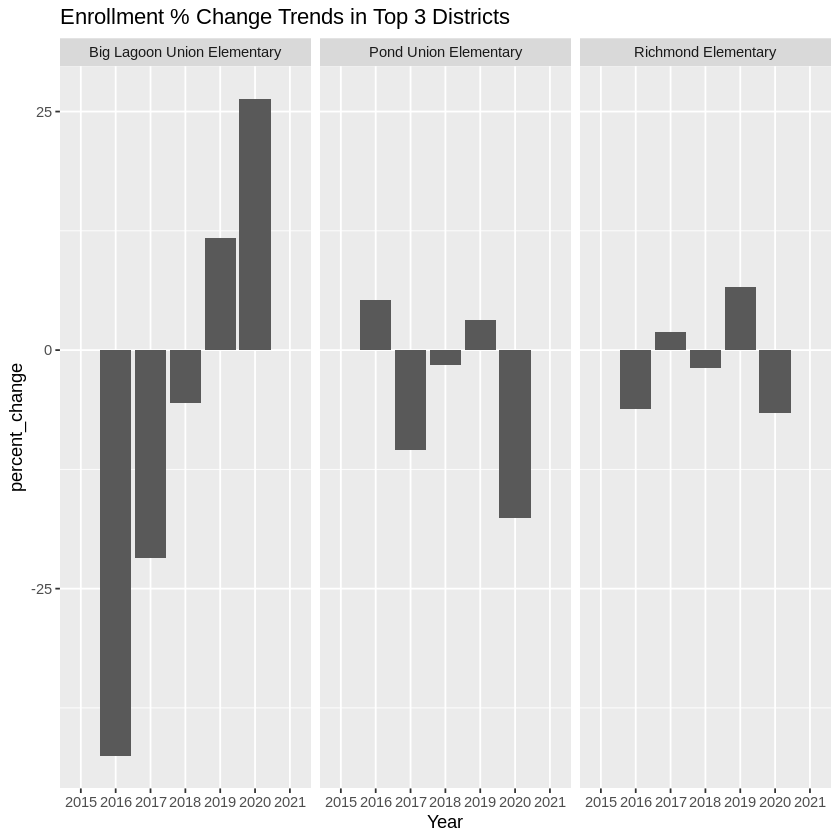

In [30]:
#Plot the % change in each of the districts experincing no change in enrollment
ggplot(no_change_3, aes(Year, percent_change)) + 
       geom_bar(stat='identity') + facet_wrap(~DISTRICT) + ggtitle('Enrollment % Change Trends in Top 3 Districts')

Each of the 2021 no percent change in enrollment districts have experienced regular shifts in the past - with big lagon experiencing the largest shifts. 

Warning message:
“Removed 3 rows containing missing values (geom_point).”

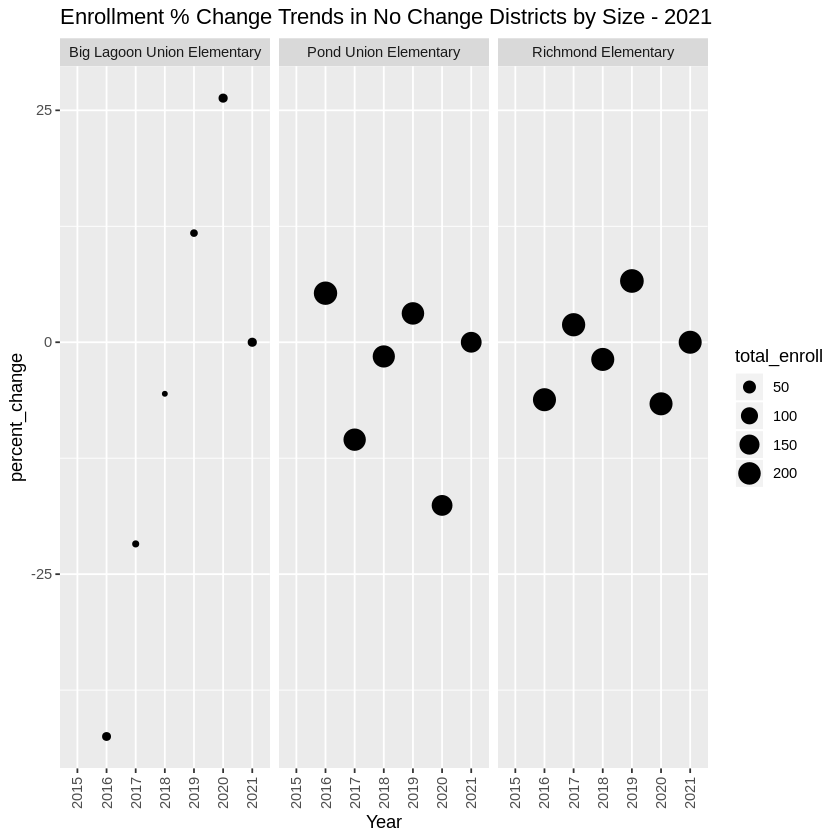

In [31]:
#plot the same districts by size to view the trends over time by size of district
ggplot(no_change_3, aes(Year, percent_change, size=total_enroll)) + 
       geom_point() + facet_wrap(~DISTRICT) + ggtitle('Enrollment % Change Trends in No Change Districts by Size - 2021') +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

Big Lagoon likely experienced the largest enrollment shifts historically due to the small size in enrollment. Both Pond Union and Richmand have historically had higher enrollment than Big Lagoon. 

### District Trends by Size

In [32]:
#Sort for top districts in terms of enrollment then look at size groupings
district_sizes <- df %>%
select(DISTRICT,Year,ENR_TOTAL) %>%
group_by(DISTRICT,Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(percent_change = (Total_Enroll/lag(Total_Enroll)-1)*100) 

district_sizes

DISTRICT,Year,Total_Enroll,percent_change
<fct>,<fct>,<int>,<dbl>
ABC Unified,2015,20998,NA
ABC Unified,2016,20863,-0.6429184
ABC Unified,2017,20768,-0.4553516
ABC Unified,2018,20550,-1.0496918
ABC Unified,2019,20465,-0.4136253
ABC Unified,2020,20269,-0.9577327
ABC Unified,2021,19540,-3.5966254
Acalanes Union High,2015,5402,NA
Acalanes Union High,2016,5546,2.6656794


In [33]:
#input size groupings for districts with small being < 2500, medium being 2500 - 9999 and large being >10000
#in order to compare the impact on different size schools

district_sizes$size <- ifelse(district_sizes$Total_Enroll <= 2500, 'small',
                            ifelse(district_sizes$Total_Enroll > 2500 & district_sizes$Total_Enroll <= 9999, 'medium',
                            ifelse(district_sizes$Total_Enroll >= 10000, 'large',0)))

district_sizes

DISTRICT,Year,Total_Enroll,percent_change,size
<fct>,<fct>,<int>,<dbl>,<chr>
ABC Unified,2015,20998,NA,large
ABC Unified,2016,20863,-0.6429184,large
ABC Unified,2017,20768,-0.4553516,large
ABC Unified,2018,20550,-1.0496918,large
ABC Unified,2019,20465,-0.4136253,large
ABC Unified,2020,20269,-0.9577327,large
ABC Unified,2021,19540,-3.5966254,large
Acalanes Union High,2015,5402,NA,medium
Acalanes Union High,2016,5546,2.6656794,medium


Warning message:
“Removed 1054 rows containing missing values (geom_point).”

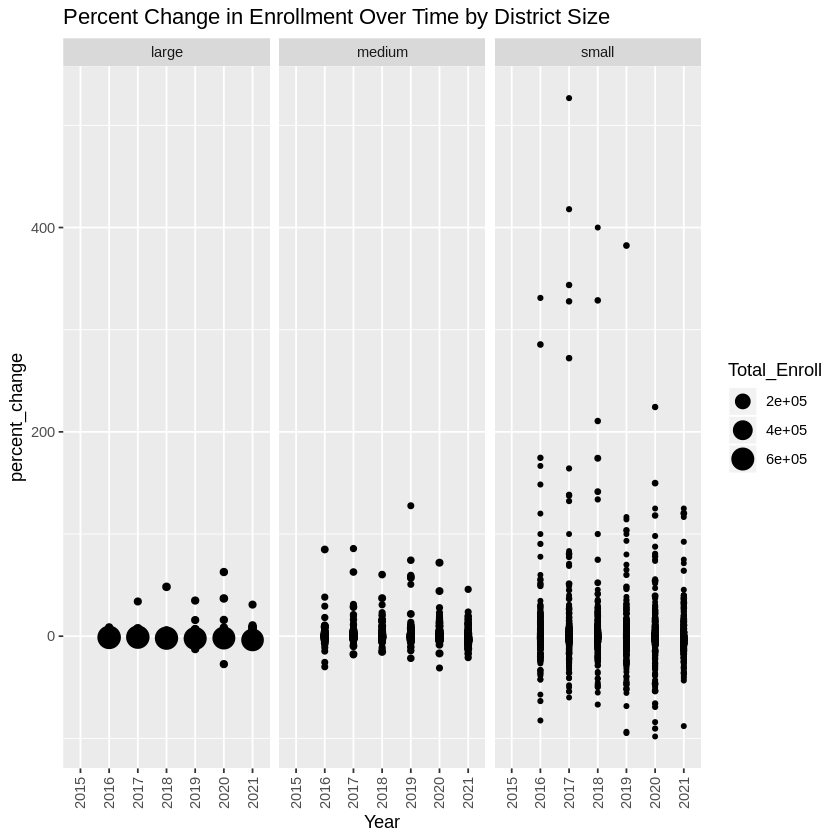

In [34]:
#plot the change in enrollment over time by district size
ggplot(district_sizes, aes(Year, percent_change, size=Total_Enroll)) + geom_point() +
facet_wrap(~size) + ggtitle('Percent Change in Enrollment Over Time by District Size') +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

The above plot shows that the smaller districts (<2500 in enrollment) have been more prone to changes in percent enrollment over times, as expected, while the medium and larger districts are less prone to large fluctuations. It is interesting to note that the small and medium sized districts show less of a range in fluctuations in 2021 than in past. 

In [35]:
#look at the change in enrollment by district size for only the year 2021
district_sizes_21 <- filter(district_sizes, Year==2021)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

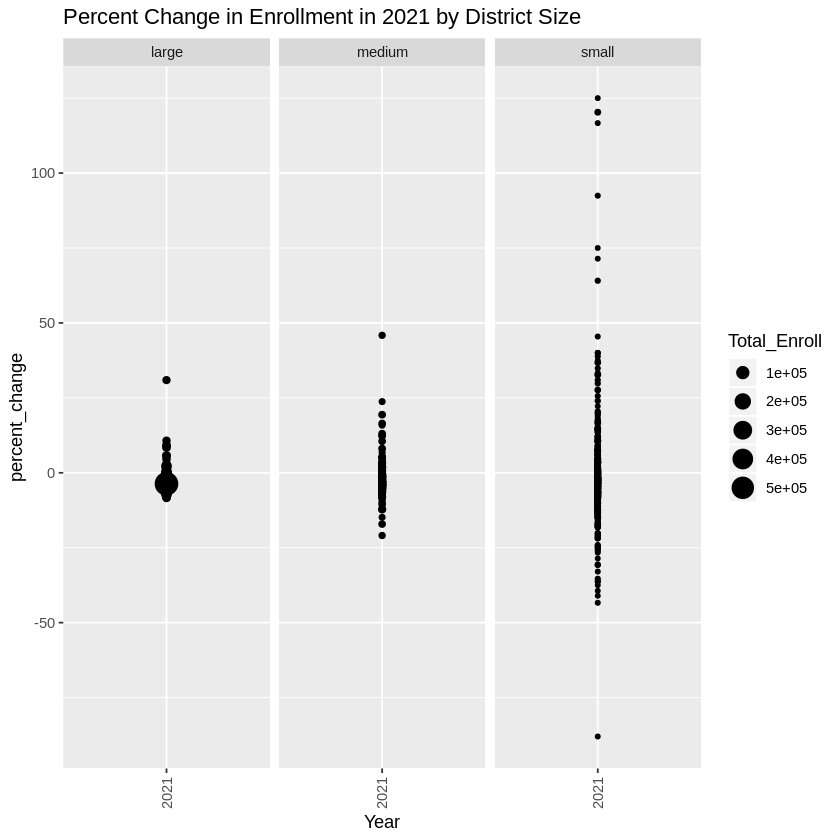

In [36]:
#same plot with just 2021 to view the ranges present
ggplot(district_sizes_21, aes(Year, percent_change, size=Total_Enroll)) + geom_point() +
facet_wrap(~size) + ggtitle('Percent Change in Enrollment in 2021 by District Size') +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [37]:
#Save our dataframe to an Rda file
saveRDS(df,file="Group7DataFrame.Rda")
